# Problem Set 6

In [4]:
import camb
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## Problem 1

The parameters can be set as it follows:
- $\Omega_k$: can be set via `pars.set_cosmology(omk=Omega_k)`;
- $\Omega_m$: can be set indirectly with `ombh2` and `omch2` in `pars.set_cosmology()`;
- $\Omega_r$: is calculated by CAMB automatically from photon density and effective number of relative species;
- $\Omega_{DE}$: it's calculated by CAMB with $\Omega_{DE} = 1 - \Omega_k - \Omega_m - \Omega_r$;
- $w$: set via `pars.set_dark_energy(w=w)`.

In [2]:
# Components
c_components = {
    'All': {'Omega_k': 0, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 0.75, 'w': -1},
    'Fixed Omega_m = 0.10': {'Omega_k': 1, 'Omega_m': 0.1, 'Omega_r': 8.2e-5, 'Omega_DE': 0.75, 'w': -1},
    'Fixed Omega_m = 0.25': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 0.75, 'w': -1},
    'Fixed Omega_m = 0.50': {'Omega_k': 1, 'Omega_m': 0.5, 'Omega_r': 8.2e-5, 'Omega_DE': 0.75, 'w': -1},
    'Fixed Omega_m = 1.00': {'Omega_k': 1, 'Omega_m': 1, 'Omega_r': 8.2e-5, 'Omega_DE': 0.75, 'w': -1},
    'Fixed Omega_DE = 0.50': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 0.5, 'w': -1},
    'Fixed Omega_DE = 0.75': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 0.75, 'w': -1},
    'Fixed Omega_DE = 1.00': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 1, 'w': -1},
    'Fixed w = -0.80': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 0.75, 'w': -0.8},
    'Fixed w = -1.00': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 0.75, 'w': -1},
    'Fixed w = -1.20': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 0.75, 'w': -1.2},
    'Fixed Omega_r = 6e-5': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 6e-5, 'Omega_DE': 0.75, 'w': -1},
    'Fixed Omega_r = 8e-5': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8e-5, 'Omega_DE': 0.75, 'w': -1},
    'Fixed Omega_r = 10e-5': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 10e-5, 'Omega_DE': 0.75, 'w': -1},
    'Flat Universe (Omega_m, Omega_DE) = (0.00, 1.00)': {'Omega_k': 0, 'Omega_m': 0, 'Omega_r': 8.2e-5, 'Omega_DE': 1, 'w': -1},
    'Flat Universe (Omega_m, Omega_DE) = (0.10, 0.90)': {'Omega_k': 0, 'Omega_m': 0.1, 'Omega_r': 8.2e-5, 'Omega_DE': 0.9, 'w': -1},
    'Flat Universe (Omega_m, Omega_DE) = (0.25, 0.75)': {'Omega_k': 0, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 0.75, 'w': -1},
    'Flat Universe (Omega_m, Omega_DE) = (0.75, 0.25)': {'Omega_k': 0, 'Omega_m': 0.75, 'Omega_r': 8.2e-5, 'Omega_DE': 0.25, 'w': -1},
    'Flat Universe (Omega_m, Omega_DE) = (1.00, 0.00)': {'Omega_k': 0, 'Omega_m': 1, 'Omega_r': 8.2e-5, 'Omega_DE': 0, 'w': -1},
}

for comp_name, params in c_components.items():
    if 'Fixed' in comp_name:
        c_components[comp_name]['Omega_k'] -= c_components[comp_name]['Omega_m'] + c_components[comp_name]['Omega_r'] + c_components[comp_name]['Omega_DE']

In [63]:
# Functions
def TCMB(Omega_r, h=0.72):
    return ((Omega_r * h**2 * 8.098e-11 * 11605**4 * 15) / (np.pi**2))**(1/4)

def ombh2(Omega_m, h=0.72):
    return 0.16 * Omega_m * h**2

def omch2(Omega_m, h=0.72):
    return 0.84 * Omega_m * h**2

In [64]:
components = {
    'Fixed $\Omega_m$ = 0.10': {'ombh2': ombh2(0.1), 'omch2': omch2(0.1)},
    'Fixed $\Omega_m$ = 0.25': {'ombh2': ombh2(0.25), 'omch2': omch2(0.25)},
    'Fixed $\Omega_m$ = 0.50': {'ombh2': ombh2(0.5), 'omch2': omch2(0.5)},
    'Fixed $\Omega_m$ = 1.00': {'ombh2': ombh2(1), 'omch2': omch2(1)},
    'Fixed $\Omega_{DE}$ = 0.50': {'omk':0, 'ombh2': ombh2(0.5), 'omch2': omch2(0.5)},
    'Fixed $\Omega_{DE}$ = 0.75': {'omk':0, 'ombh2': ombh2(0.25), 'omch2': omch2(0.25)},
    'Fixed $\Omega_{DE}$ = 1.00': {'omk':0, 'ombh2': ombh2(1e-2), 'omch2': omch2(1e-2)},
    'Fixed $w$ = -0.80': {'w':-0.8},
    'Fixed $w$ = -1.00': {'w':-1},
    'Fixed $w$ = -1.20': {'w':-1.2},
    'Fixed $\Omega_r$ = 6e-5': {'TCMB':TCMB(6e-5)},
    'Fixed $\Omega_r$ = 8e-5': {'TCMB':TCMB(8e-5)},
    'Fixed $\Omega_r$ = 10e-5': {'TCMB':TCMB(10e-5)},
    'Flat Universe $(\Omega_m, \Omega_{DE})$ = (0.00, 1.00)': {'omk':0, 'ombh2': ombh2(1e-2), 'omch2': omch2(1e-2)},
    'Flat Universe $(\Omega_m, \Omega_{DE})$ = (0.10, 0.90)': {'omk':0, 'ombh2': ombh2(0.1), 'omch2': omch2(0.1)},
    'Flat Universe $(\Omega_m, \Omega_{DE})$ = (0.25, 0.75)': {'omk':0, 'ombh2': ombh2(0.25), 'omch2': omch2(0.25)},
    'Flat Universe $(\Omega_m, \Omega_{DE})$ = (0.75, 0.25)': {'omk':0, 'ombh2': ombh2(0.75), 'omch2': omch2(0.75)},
    'Flat Universe $(\Omega_m, \Omega_{DE})$ = (1.00, 0.00)': {'omk':0, 'ombh2': ombh2(1), 'omch2': omch2(1)},
}

In [65]:
print(components['Fixed $\Omega_r$ = 8e-5'])

{'TCMB': 3.1018887043003596}


In [21]:
def P_k(H0=72.0, ombh2=0.022, omch2=0.12, omk=0, TCMB=2.725, w=-1):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, TCMB=TCMB, omk=omk)
    pars.set_dark_energy(w=w)
    pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
    pars.set_matter_power(redshifts=[0], kmax=100)
    results = camb.get_results(pars)
    kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=100, npoints=200)
    return kh, pk[0]

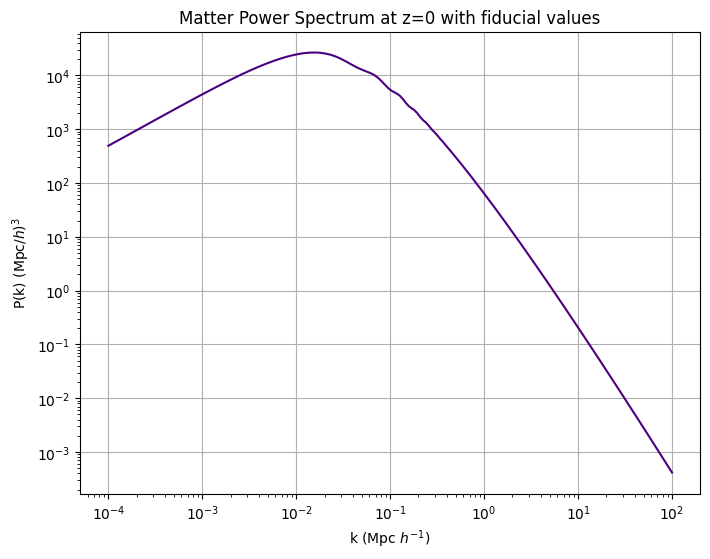

In [23]:
# Fiducial
kh, pk = P_k()
plt.figure(figsize=(8, 6))
plt.loglog(kh, pk, c='indigo')
plt.xlabel(r'k (Mpc $h^{-1}$)')
plt.ylabel(r'P(k) (Mpc/$h$)$^3$')
plt.title('Matter Power Spectrum at z=0 with fiducial values')
plt.grid(True)
plt.show()

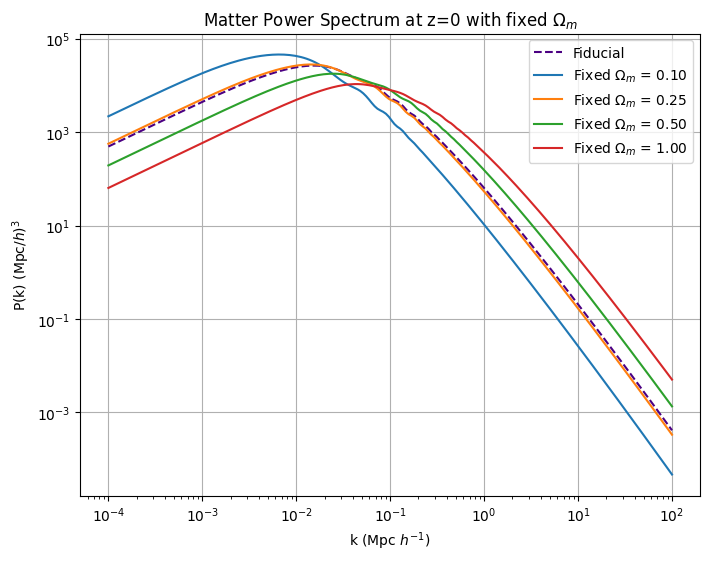

In [114]:
# Fixed Omega_m
plt.figure(figsize=(8, 6))
kh, pk = P_k()
plt.loglog(kh, pk, '--', c='indigo', label='Fiducial')
for comp_name, params in components.items():
    if 'Fixed $\Omega_m$' in comp_name:
        kh, pk = P_k(ombh2=params['ombh2'], omch2=params['omch2'])
        plt.loglog(kh, pk, label=f'{comp_name}')
plt.xlabel(r'k (Mpc $h^{-1}$)')
plt.ylabel(r'P(k) (Mpc/$h$)$^3$')
plt.title(r'Matter Power Spectrum at z=0 with fixed $\Omega_m$')
plt.savefig('P_k_Omega_m.png', dpi=240)
plt.grid(True)
plt.legend()
plt.show()

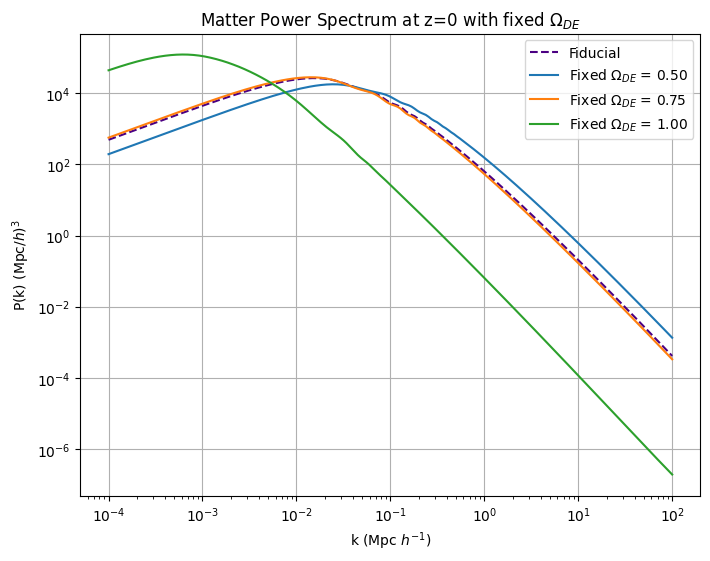

In [115]:
# Fixed Omega_DE
plt.figure(figsize=(8, 6))
kh, pk = P_k()
plt.loglog(kh, pk, '--', c='indigo', label='Fiducial')
for comp_name, params in components.items():
    if 'Fixed $\Omega_{DE}$' in comp_name:
        kh, pk = P_k(ombh2=params['ombh2'], omch2=params['omch2'], omk=params['omk'])
        plt.loglog(kh, pk, label=f'{comp_name}')
plt.xlabel(r'k (Mpc $h^{-1}$)')
plt.ylabel(r'P(k) (Mpc/$h$)$^3$')
plt.title(r'Matter Power Spectrum at z=0 with fixed $\Omega_{DE}$')
plt.grid(True)
plt.legend()
plt.savefig('P_k_Omega_DE.png', dpi=240)
plt.show()

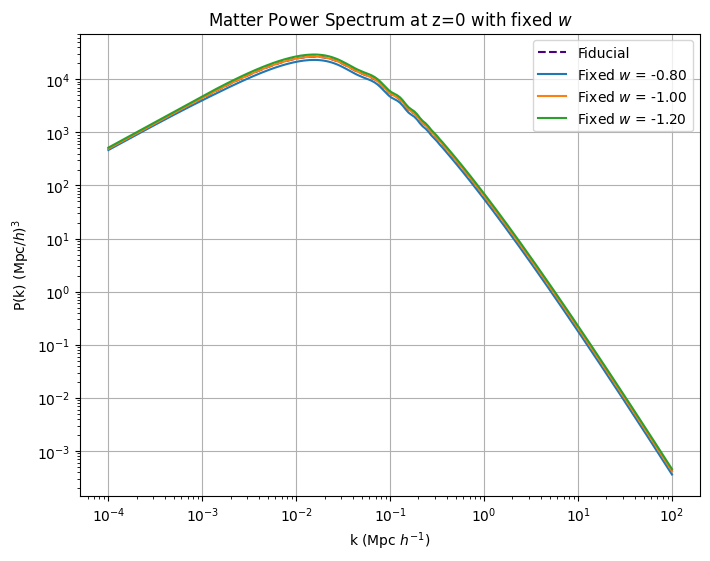

In [116]:
# Plot for different components with fixed w
plt.figure(figsize=(8, 6))
kh, pk = P_k()
plt.loglog(kh, pk, '--', c='indigo', label='Fiducial')
for comp_name, params in components.items():
    if 'Fixed $w$' in comp_name:
        kh, pk = P_k(w=params['w'])
        plt.loglog(kh, pk, label=f'{comp_name}')
plt.xlabel(r'k (Mpc $h^{-1}$)')
plt.ylabel(r'P(k) (Mpc/$h$)$^3$')
plt.title(r'Matter Power Spectrum at z=0 with fixed $w$')
plt.grid(True)
plt.legend()
plt.savefig('P_k_w.png', dpi=240)
plt.show()

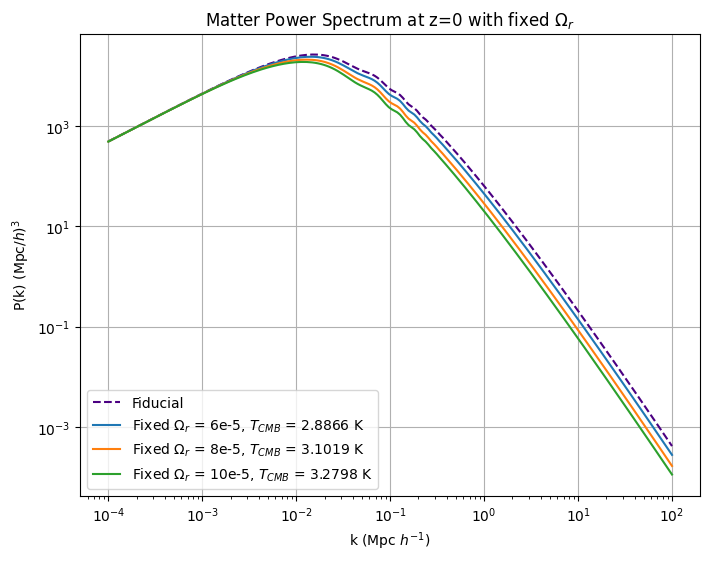

In [117]:
# Plot for different components with fixed Omega_r
plt.figure(figsize=(8, 6))
kh, pk = P_k()
plt.loglog(kh, pk, '--', c='indigo', label='Fiducial')
for comp_name, params in components.items():
    if 'Fixed $\Omega_r$' in comp_name:
        kh, pk = P_k(TCMB=params['TCMB'])
        plt.loglog(kh, pk, label=f"{comp_name}, $T_{{CMB}}$ = {params['TCMB']:.4f} K")
plt.xlabel(r'k (Mpc $h^{-1}$)')
plt.ylabel(r'P(k) (Mpc/$h$)$^3$')
plt.title(r'Matter Power Spectrum at z=0 with fixed $\Omega_r$')
plt.grid(True)
plt.legend()
plt.savefig('P_k_Omega_r.png', dpi=240)
plt.show()

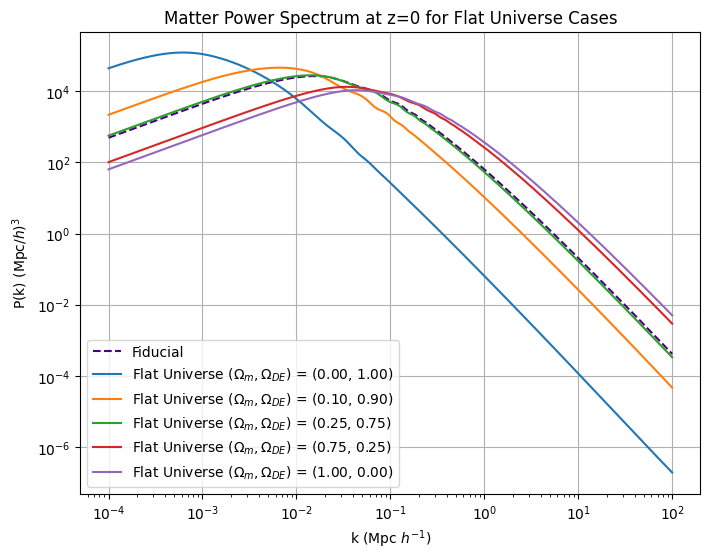

In [118]:
# Plot for different components with flat universe cases
plt.figure(figsize=(8, 6))
kh, pk = P_k()
plt.loglog(kh, pk, '--', c='indigo', label='Fiducial')
for comp_name, params in components.items():
    if 'Flat Universe' in comp_name:
        kh, pk = P_k(ombh2=params['ombh2'], omch2=params['omch2'], omk=params['omk'])
        plt.loglog(kh, pk, label=f'{comp_name}')
plt.xlabel(r'k (Mpc $h^{-1}$)')
plt.ylabel(r'P(k) (Mpc/$h$)$^3$')
plt.title(r'Matter Power Spectrum at z=0 for Flat Universe Cases')
plt.grid(True)
plt.legend()
plt.savefig('P_k_flat.png', dpi=240)
plt.show()

## Problem 3

In [98]:
# Functions
def W_tilde(k, R):
    return (3/(k*R)**3) * (np.sin(k*R) - k*R*np.cos(k*R))

def sigma_r(k, R, pk):
    s = np.sqrt(np.trapz((k**2 * pk * np.abs(W_tilde(k, R))**2), k) / (2*np.pi**2))
    return s

In [113]:
kh, pk = P_k()
R = np.linspace(1e-2, 1e2, 200)

k_min_values = [1e-4, 1e-3, 1e-2]
k_max_values = [1e1, 1e2, 1e3]

for k_min in k_min_values:
    for k_max in k_max_values:
        mask = (kh >= k_min) & (kh <= k_max)
        kh_trimmed = kh[mask]
        pk_trimmed = pk[mask]
        if len(kh_trimmed) > 0:
            sigma_values = [sigma_r(kh_trimmed, r, pk_trimmed) for r in R]
            print(f"k_min: {k_min}, k_max: {k_max}, sigma_R: {np.mean(sigma_values)}")
print(f'std: {np.std(sigma_values)}')

k_min: 0.0001, k_max: 10.0, sigma_R: 0.3229591456777434
k_min: 0.0001, k_max: 100.0, sigma_R: 0.3380915903006408
k_min: 0.0001, k_max: 1000.0, sigma_R: 0.3380915903006408
k_min: 0.001, k_max: 10.0, sigma_R: 0.32295890488065526
k_min: 0.001, k_max: 100.0, sigma_R: 0.33809134952148623
k_min: 0.001, k_max: 1000.0, sigma_R: 0.33809134952148623
k_min: 0.01, k_max: 10.0, sigma_R: 0.3216426628503388
k_min: 0.01, k_max: 100.0, sigma_R: 0.3367752117698008
k_min: 0.01, k_max: 1000.0, sigma_R: 0.3367752117698008
std: 0.630126075443385


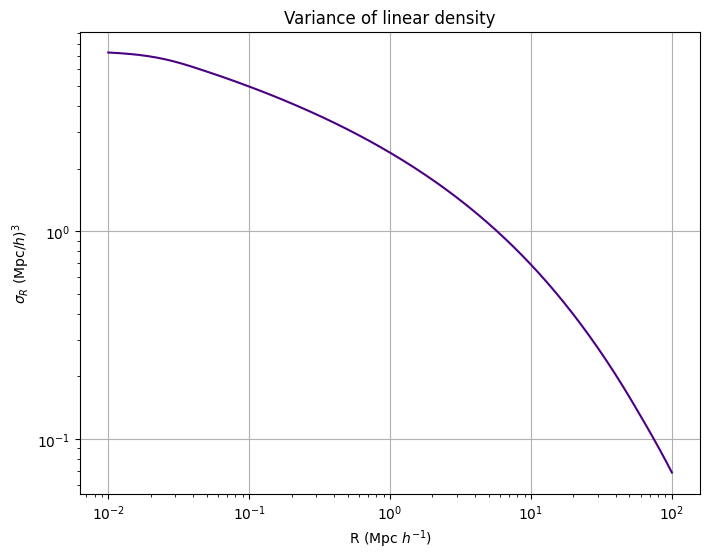

In [121]:
kh, pk = P_k()
R = np.logspace(-2, 2, 200)
sigma_values = [sigma_r(kh, r, pk) for r in R]
plt.figure(figsize=(8, 6))
plt.loglog(R, sigma_values, c='indigo')
plt.title('Variance of linear density')
plt.xlabel(r'R (Mpc $h^{-1}$)')
plt.ylabel(r'$\sigma_R$ (Mpc/$h$)$^3$')
plt.grid()
plt.savefig('sigma_R.png', dpi=240)
plt.show()

In [104]:
sigma_8 = sigma_r(kh, 8, pk)
print(f'sigma_8 = {sigma_8:.4f}')

sigma_8 = 0.8064
